In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")

# Show first 5 rows
print(df.head())

# Show shape (rows, columns)
print("Shape of dataset:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3273     159     12                               300   
1       3264     137     10                               283   
2       3256     143      7                               234   
3       3268     176     16                               270   
4       3268     179     15                               270   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              55                             2863   
1                              45                             2773   
2                              37                             2713   
3                              50                             2955   
4                              50                             2925   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            233             242            138   
1            236             236            131   
2            231             239   

Class counts:
 Cover_Type
3    35754
7    20510
6    17367
Name: count, dtype: int64


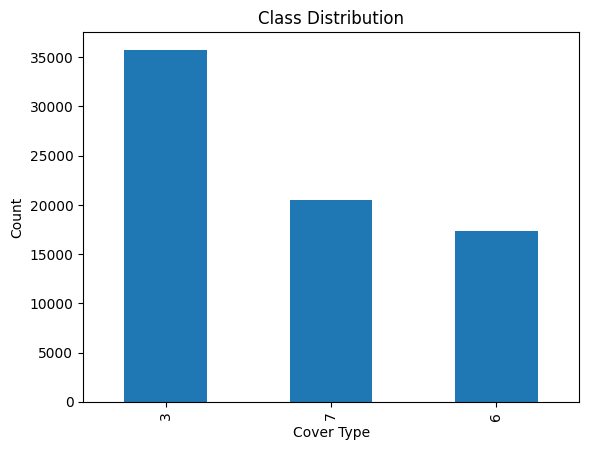

In [6]:

import matplotlib.pyplot as plt


# Count each class
class_counts = df['Cover_Type'].value_counts()
print("Class counts:\n", class_counts)

# Plot class distribution
class_counts.plot(kind='bar')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


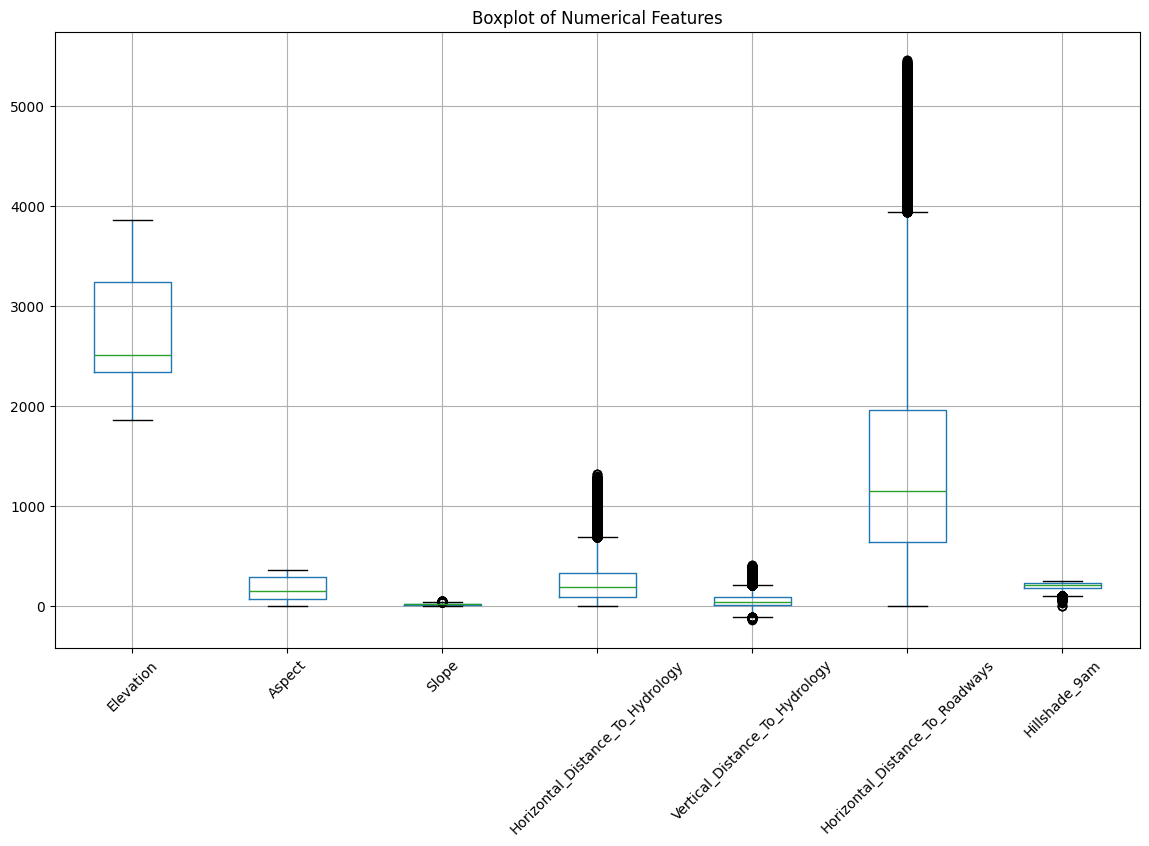

In [12]:
# Boxplot for distribution
plt.figure(figsize=(14, 8))
df.iloc[:, :7].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

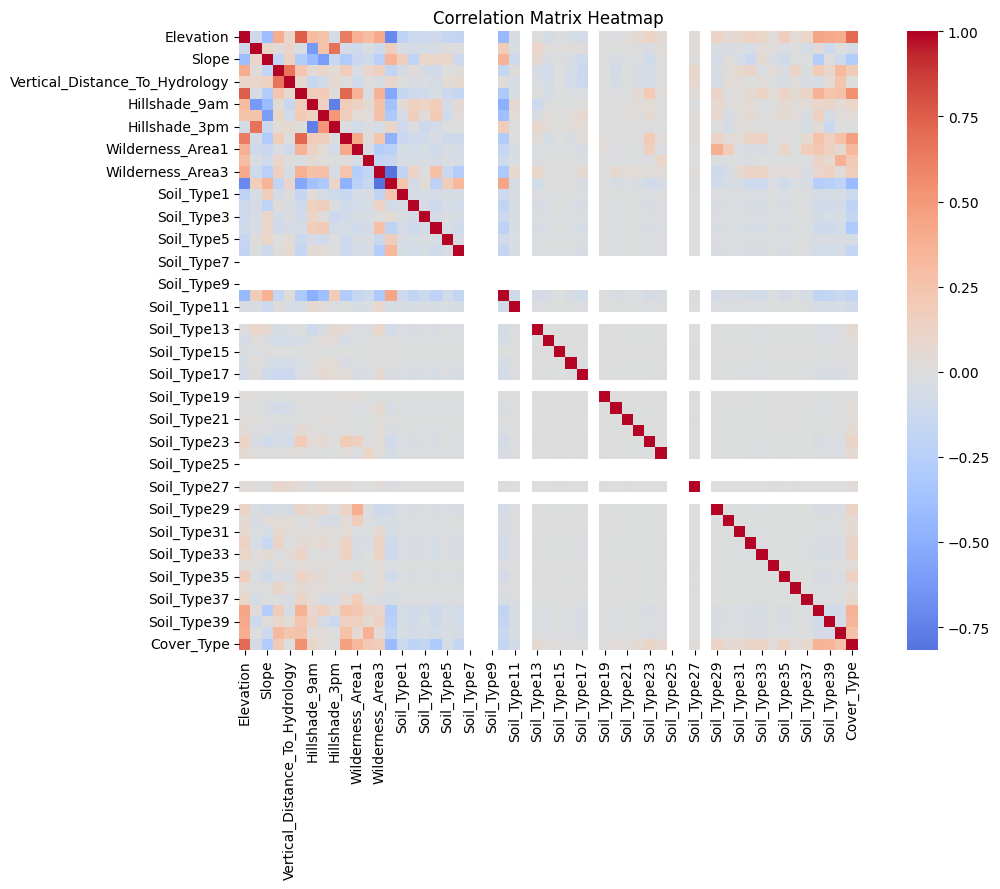

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            center=0, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

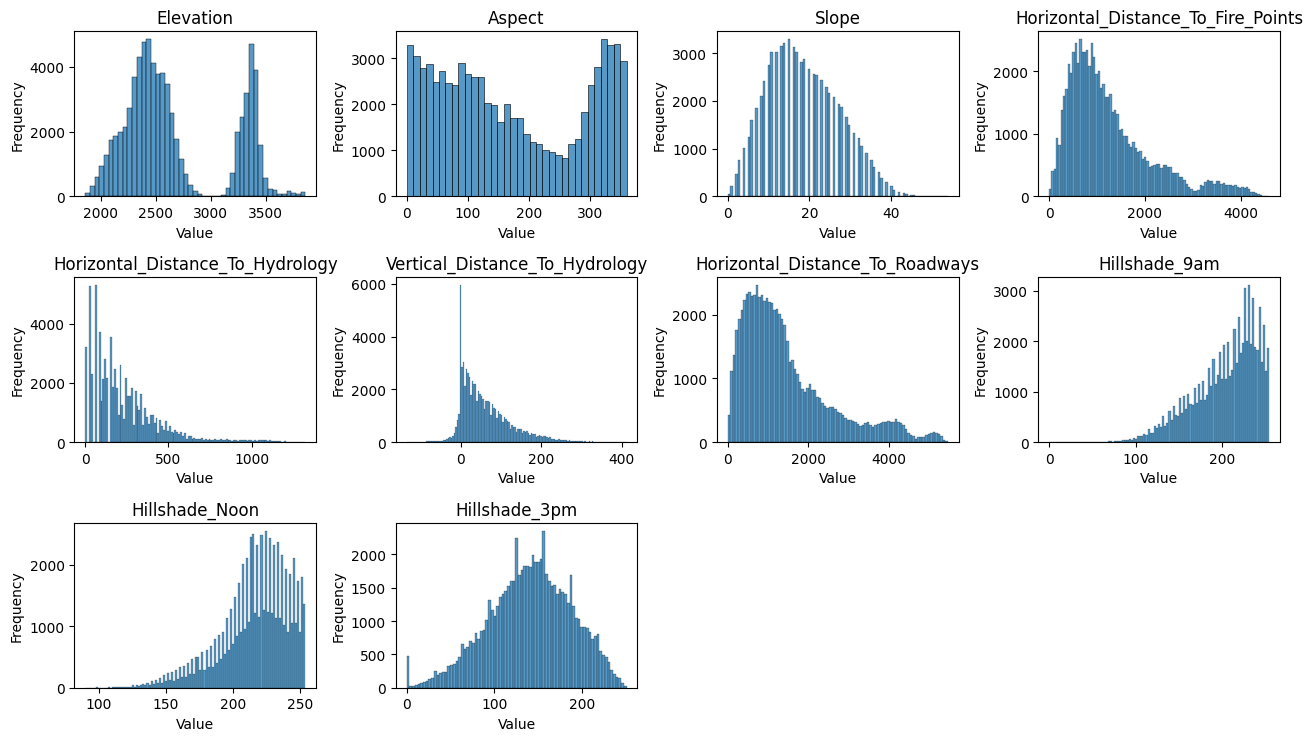

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm'
]


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(13, 12))
axes = axes.flatten()  

for i, col in enumerate(features_to_plot):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')


for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Top 10 Important Features:
 Elevation                             0.254593
Horizontal_Distance_To_Roadways       0.135324
Horizontal_Distance_To_Fire_Points    0.095859
Horizontal_Distance_To_Hydrology      0.049812
Aspect                                0.039262
Vertical_Distance_To_Hydrology        0.038911
Hillshade_9am                         0.035729
Soil_Type39                           0.034295
Hillshade_Noon                        0.033490
Soil_Type38                           0.032882
dtype: float64


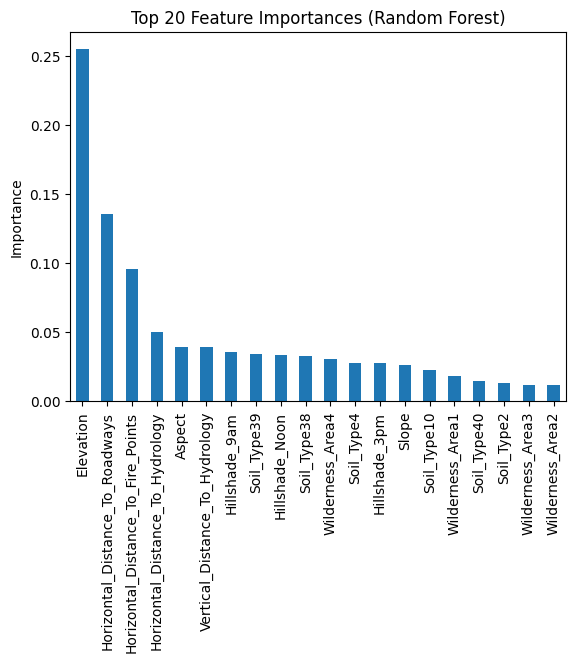

In [23]:
##  Randomm Forest သုံးပြီး feature important ကိုရွေး
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split features and target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print top 10 features
print("Top 10 Important Features:\n", feat_imp.head(10))

# Plot feature importance
feat_imp.head(20).plot(kind="bar")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()


In [24]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2) Split features/target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 4) Fit a RandomForest to get feature importances
rf_for_importance = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_for_importance.fit(X_train, y_train)

# 5) Pick Top-20 important features
importances = pd.Series(rf_for_importance.feature_importances_, index=X.columns)
top20_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("Top-20 features:\n", top20_features)

# 6) Reduce train/test to Top-20 features
X_train_top20 = X_train[top20_features]
X_test_top20 = X_test[top20_features]

# 7) Train a final model on Top-20 (you can swap with any classifier later)
rf_final = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_final.fit(X_train_top20, y_train)

# 8) Evaluate
y_pred = rf_final.predict(X_test_top20)
print("Accuracy (Top-20 features):", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Top-20 features:
 ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Soil_Type39', 'Hillshade_Noon', 'Soil_Type38', 'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope', 'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2', 'Wilderness_Area3', 'Wilderness_Area2']
Accuracy (Top-20 features): 0.9699191960344945

Classification report:
               precision    recall  f1-score   support

           3       0.96      0.98      0.97      7036
           6       0.96      0.92      0.94      3607
           7       1.00      1.00      1.00      4084

    accuracy                           0.97     14727
   macro avg       0.97      0.97      0.97     14727
weighted avg       0.97      0.97      0.97     14727



                             Model  Accuracy  F1-score
0     Logistic Regression (scaled)  0.825626  0.815354
1  Support Vector Machine (scaled)  0.866436  0.858248
2                    Decision Tree  0.959870  0.959823
3                    Random Forest  0.973111  0.972978
4                Gradient Boosting  0.874788  0.870228


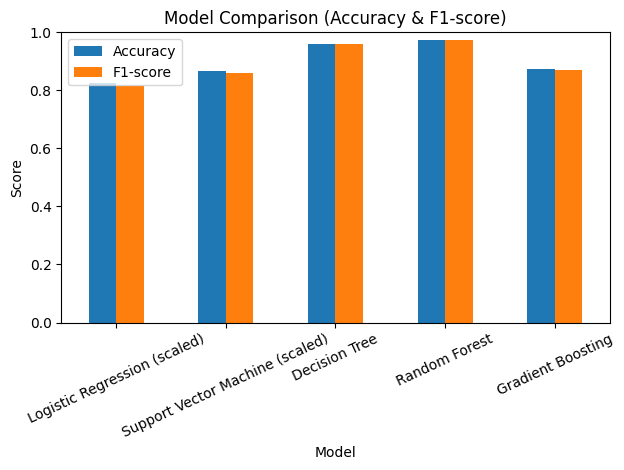

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC  # SVC (Support Vector Classifier) ကို import လုပ်ပါ။
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")

# Data ကို features (X) နဲ့ target (y) အဖြစ် ခွဲပါ။
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (SVM ကို pipeline ထဲ ထည့်သွင်းပါ။)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, n_jobs=-1))
    ]),
    # SVM model ကို ဒီနေရာမှာ ထည့်သွင်းပါ။
    "Support Vector Machine (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(random_state=42))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=25)
plt.title("Model Comparison (Accuracy & F1-score)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


                 Model  Accuracy  F1-score
0  Logistic Regression  0.485571  0.317425
1        Decision Tree  0.368032  0.369490
2        Random Forest  0.430909  0.378154
3    Gradient Boosting  0.484960  0.317843


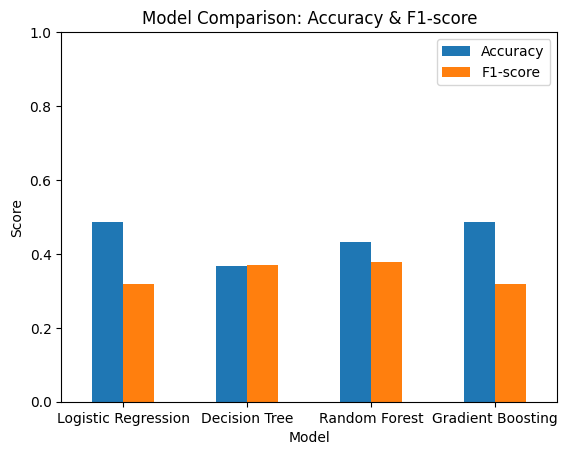

In [ ]:
#sc‌aled မလုပ် top ၂၀ features သုံး
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train_top20, y_train)
    y_pred = model.predict(X_test_top20)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Results in DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison: Accuracy & F1-score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


In [ ]:
##scaled လုပ် all features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC  # SVC (Support Vector Classifier) ကို import လုပ်ပါ။
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")

# Data ကို features (X) နဲ့ target (y) အဖြစ် ခွဲပါ။
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (SVM ကို pipeline ထဲ ထည့်သွင်းပါ။)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, n_jobs=-1))
    ]),
    # SVM model ကို ဒီနေရာမှာ ထည့်သွင်းပါ။
    "Support Vector Machine (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel='linear',random_state=42))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=25)
plt.title("Model Comparison (Accuracy & F1-score)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

                          Model  Accuracy  F1-score
0  Logistic Regression (scaled)  0.815509  0.805150
1                 Decision Tree  0.957425  0.957401
2                 Random Forest  0.975148  0.975053
3             Gradient Boosting  0.872683  0.868716


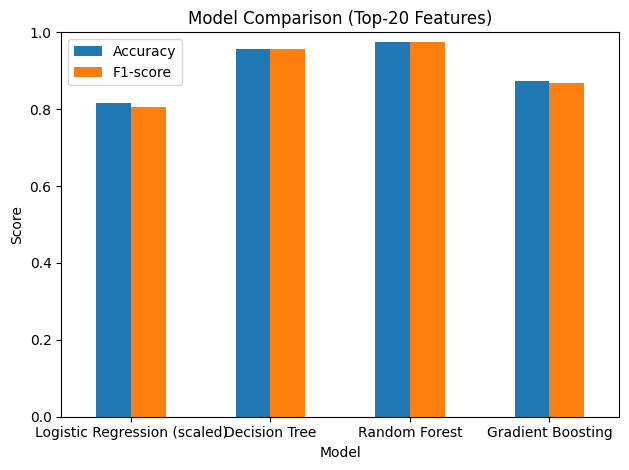

In [ ]:
#scaled လုပ် top ၂၀ features သုံး
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")

# --- Use only Top-20 features (from feature importance results) ---
top20_features = [
    'Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology',
    'Hillshade_9am', 'Hillshade_Noon', 'Soil_Type39', 'Soil_Type38',
    'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope',
    'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2',
    'Wilderness_Area3', 'Wilderness_Area2'
]

X = df[top20_features]   # keep only top-20 features
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (scale only Logistic Regression)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Top-20 Features)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


                             Model  Accuracy  F1-score
0     Logistic Regression (scaled)  0.825626  0.815329
1  Support Vector Machine (scaled)  0.866436  0.858248
2                    Decision Tree  0.959870  0.959823
3                    Random Forest  0.973111  0.972978
4                Gradient Boosting  0.874788  0.870228


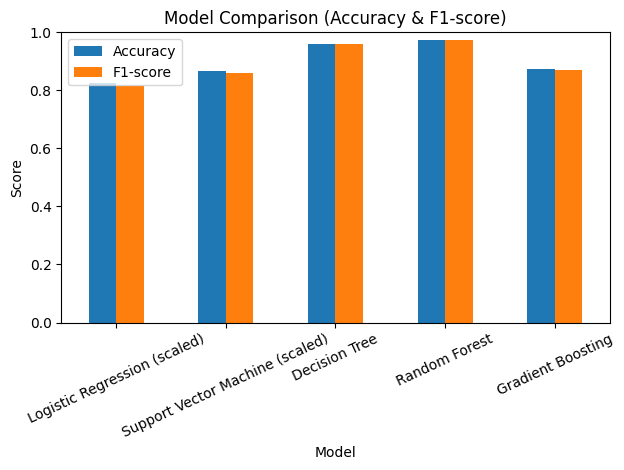

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC  # Import the SVC model
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (scale Logistic Regression and SVM via Pipeline)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    # Add SVM here within a pipeline
    "Support Vector Machine (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(random_state=42))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results as a table
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=25)
plt.title("Model Comparison (Accuracy & F1-score)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Classification report (Random Forest):

              precision    recall  f1-score   support

           3       0.96      0.98      0.97      7151
           6       0.96      0.92      0.94      3474
           7       1.00      1.00      1.00      4102

    accuracy                           0.97     14727
   macro avg       0.97      0.97      0.97     14727
weighted avg       0.97      0.97      0.97     14727



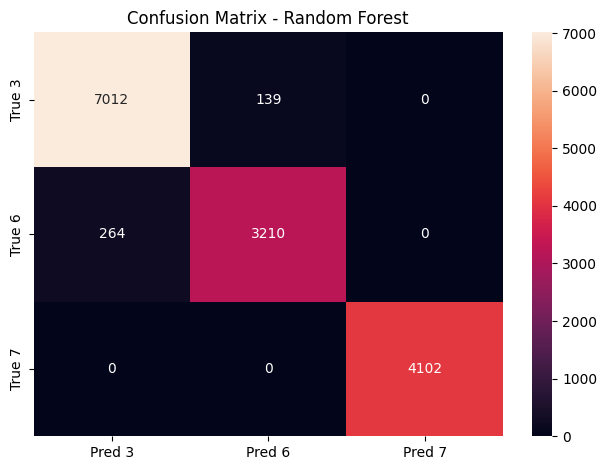

In [ ]:
# Confusion matrix + classification report for the best model (Random Forest)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train RF (same as before)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict + reports
y_pred = rf.predict(X_test)
print("Classification report (Random Forest):\n")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
cm_df = pd.DataFrame(cm, index=[f"True {c}" for c in sorted(y.unique())],
                        columns=[f"Pred {c}" for c in sorted(y.unique())])
plt.figure()
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


In [10]:
# Quick hyperparameter tuning for Random Forest (to try to beat your current score)
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint

# Load data
df = pd.read_csv("covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Search space (small & fast)
param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(10, 40),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=30,
    scoring="f1_weighted", cv=3, random_state=42, n_jobs=-1, verbose=1
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy (tuned RF):", accuracy_score(y_test, y_pred))
print("F1-weighted (tuned RF):", f1_score(y_test, y_pred, average="weighted"))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'max_depth': 24, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 249}
Accuracy (tuned RF): 0.9799008623616486
F1-weighted (tuned RF): 0.9798522027786656


                     Model  Accuracy  F1_weighted
0  Random Forest (default)    0.9726       0.9725
1    Random Forest (tuned)    0.9799       0.9798


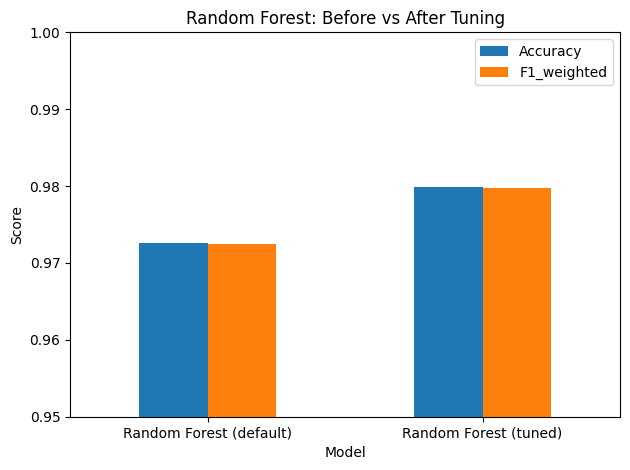

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Previous Random Forest (before tuning)
rf_before = {"Model": "Random Forest (default)", "Accuracy": 0.9726, "F1_weighted": 0.9725}

# Tuned Random Forest (after tuning)
rf_after = {"Model": "Random Forest (tuned)", "Accuracy": 0.9799, "F1_weighted": 0.9798}

# Combine into DataFrame
compare_df = pd.DataFrame([rf_before, rf_after])
print(compare_df)

# Plot
compare_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Random Forest: Before vs After Tuning")
plt.ylabel("Score")
plt.ylim(0.95, 1.0)  # zoom in to highlight improvement
plt.tight_layout()
plt.show()


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l

                          Model  Accuracy  F1-score
0  Logistic Regression (scaled)  0.815305  0.804975
1                 Decision Tree  0.957221  0.957206
2                 Random Forest  0.975759  0.975661
3             Gradient Boosting  0.872683  0.868716


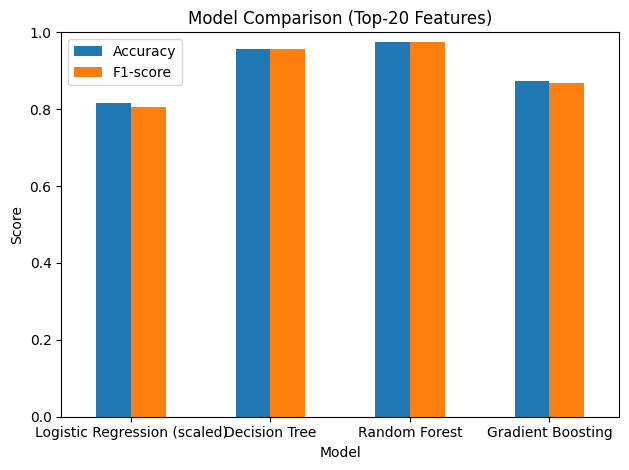

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1) Load data
df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Define model
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# 4) Cross Validation (Stratified KFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc = cross_val_score(rf, X_train, y_train, cv=cv, scoring="accuracy")
cv_f1 = cross_val_score(rf, X_train, y_train, cv=cv, scoring="f1_weighted")

print("Cross-Validation Results (Train set only):")
print("Accuracy (per fold):", cv_acc)
print("F1-score (per fold):", cv_f1)
print("Mean CV Accuracy:", cv_acc.mean())
print("Mean CV F1-score:", cv_f1.mean())

# 5) Fit on full train set & evaluate on test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nFinal Test Set Results:")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-weighted:", f1_score(y_test, y_pred, average="weighted"))

# Compare CV vs Test
print("\n>>> If CV scores >> Test score => Overfitting Suspected <<<")
print(">>> If CV ≈ Test score => Model Generalizes Well <<<")


Cross-Validation Results (Train set only):
Accuracy (per fold): [0.9714795  0.9685935  0.96842373 0.96935744 0.97062818]
F1-score (per fold): [0.97134307 0.9684164  0.96820007 0.9692536  0.9705156 ]
Mean CV Accuracy: 0.9696964710666898
Mean CV F1-score: 0.9695457488773981

Final Test Set Results:
Test Accuracy: 0.973110613159503
Test F1-weighted: 0.9729775386653142

>>> If CV scores >> Test score => Overfitting Suspected <<<
>>> If CV ≈ Test score => Model Generalizes Well <<<


In [2]:
from imblearn.over_sampling import SMOTE

df = pd.read_csv("Data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Evaluate on test set (original distribution)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-weighted:", f1_score(y_test, y_pred, average="weighted"))


Original class distribution:
 Cover_Type
3    28603
7    16408
6    13893
Name: count, dtype: int64
After SMOTE:
 Cover_Type
6    28603
3    28603
7    28603
Name: count, dtype: int64
Test Accuracy: 0.9756230053642969
Test F1-weighted: 0.9756541952256551
